<h1 style='background:brown; border:0; color:white'><center>⚽FIFA 20-EDA⚽</center><h1>



---

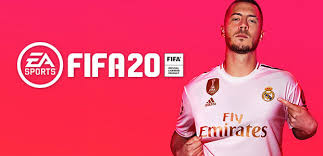


FIFA 20 is a football simulation video game published by Electronic Arts as part of the FIFA series. It is the 27th installment in the FIFA series, and was released on 27 September 2019 for Microsoft Windows, PlayStation 4, Xbox One, and Nintendo Switch. 


Real Madrid winger Eden Hazard was named the new cover star of the Regular Edition, with Liverpool defender Virgil van Dijk on the cover of the Champions Edition.Former Juventus and Real Madrid midfielder Zinedine Zidane was later named as the cover star for the Ultimate Edition.

# **Table of Contents**

<a id = 'max 10'></a>

* [Importing Libraries and Exploring Data](#1)


* [Data Manipualtion and Cleaning](#2)
  * Deleted Useless Columns
  * Formed a new column of BMI using Weights and Heights column
  * Countered Null values using Get Dummies for Player positions
  * For columns like Dribbling, Defendind,Pace etc used Median value


* [Data Analysis](#3)
   * Relationship of Overall Rating and Value in Euros using Scatter Plot
   * Relationship of Potential Rating and Wage in Euros using Scatter Plot
   * Count of Preferred Foot and International Reputation using Count Plot
   * Distribution of Age and BMI using Histogram
   * Relationship of BMI vs Pace and Weight vs Pace using Reg Plot
   
   
   
* [Top 20 Analysis](#4)
   * Which Country has Max players in Top 20?
   * Which Club has Max players in Top 20?
   * Which type of player comes most in Top 20?
   * Which age belongs to max players in Top 20?
   
   
   
* [The Biggest Rivalry - Messi and Ronaldo](#5)
   * Comparison of different attributes using **Radar Plot**
   
   
* [Other Top Class Comparisons](#6)
   * Comparison of Kevin De Bryne and Luka Modric using Radar Plot
   * Comparison of Van Dijk and Sergio Ramos using Radar Plot
   * Comparison of Harry Kane and Sergio Aguero using Radar Plot
   

* [Word Cloud](#7)
   * Word Cloud for Club and Country of Top 20 Players


# **1. Importing Libraries & Data Exploration** <a class="anchor" id="1"></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi #Used in Radar Plots
import seaborn as sns
sns.set_style(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
fifa_20 = pd.read_csv('../input/fifa-20-complete-player-dataset/players_20.csv')

In [ ]:
fifa_20.head()

In [ ]:
fifa_20.shape # To check no of rows and columns

In [ ]:
col = list(fifa_20.columns)  # To print all the columns
print(col)

# **2. Data Manipulation & Cleaning** <a class="anchor" id="2"></a>

In [ ]:
useless_column = ['dob','sofifa_id','player_url','long_name','body_type','real_face','nation_position','loaned_from','nation_jersey_number']

In [ ]:
fifa_20 = fifa_20.drop(useless_column, axis = 1)

In [ ]:
fifa_20['BMI'] = fifa_20 ['weight_kg'] / (fifa_20['height_cm'] / 100) ** 2

In [ ]:
fifa_20[['short_name','player_positions']]

In [ ]:
new_player_position = fifa_20['player_positions'].str.get_dummies(sep=',').add_prefix('Position')
new_player_position.head()

In [ ]:
fifa_20 =  pd.concat([fifa_20,new_player_position],axis = 1)

In [ ]:
fifa_20.head()

In [ ]:
fifa_20 =  fifa_20.drop('player_positions',axis=1)

In [ ]:
columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

In [ ]:
fifa_20[columns].head()

In [ ]:
for col in columns:
  fifa_20[col]=fifa_20[col].str.split('+',n=1,expand = True)[0]

fifa_20[columns]

In [ ]:
fifa_20[columns] = fifa_20[columns].fillna(0)

In [ ]:
fifa_20[columns] = fifa_20[columns].astype(int)

In [ ]:
columns = ['dribbling','defending','physic','passing','shooting','pace']

In [ ]:
fifa_20[columns]

In [ ]:
fifa_20[columns].isnull().sum()

In [ ]:
for col in columns:
  fifa_20[col] = fifa_20[col].fillna(fifa_20[col].median())
fifa_20[columns]

In [ ]:
fifa_20 = fifa_20.fillna(0)

In [ ]:
fifa_20.isnull().sum() #Verifying it Should be all zero

# **3. Let's Start with Analysis**<a class="anchor" id="3"></a>

In [ ]:
sns.relplot(x='overall',y='value_eur',hue='age',palette = 'viridis',size="BMI", sizes=(15, 200),aspect=2,data=fifa_20)
plt.title('Overall Rating vs Value in Euros',fontsize = 20)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()

In [ ]:
sns.relplot(x='potential',y='wage_eur',hue='age',palette = 'viridis',size="BMI", sizes=(15, 200),aspect=2,data=fifa_20)
plt.title('Potential Rating vs Wage in Euros',fontsize = 20)
plt.xlabel('Potential')
plt.ylabel('Wage in Euros')
plt.show()

In [ ]:
plt.figure(dpi=125)
sns.countplot('preferred_foot',data=fifa_20,palette='Blues')
plt.xlabel('Preferred Foot Players')
plt.ylabel('Count')
plt.title('Count of Preferred Foot')
Right,Left=fifa_20.preferred_foot.value_counts()
print('Left Preferred',Left)
print('Right Preferred',Right)
plt.show()

In [ ]:
plt.figure(dpi=125)
sns.countplot('international_reputation',data=fifa_20.head(100),palette='Blues')
plt.xlabel('International Reputation')
plt.ylabel('Count')
plt.title('Count of International Reputation of Top 100 Players')
plt.show()

In [ ]:
plt.figure(dpi=125)
sns.distplot(a=fifa_20['age'],kde=False,bins=20,color='red')
plt.axvline(x=np.mean(fifa_20['age']),c='green',ls='--',label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

In [ ]:
plt.figure(dpi=125)
sns.distplot(a=fifa_20['BMI'],kde=False,bins=20,color='green')
plt.axvline(x=np.mean(fifa_20['BMI']),c='black',ls='--',label='Mean BMI of All Players')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.show()

In [ ]:
plt.figure(figsize=(12,6),dpi=125)
x=fifa_20['weight_kg']
y=fifa_20['pace']

sns.regplot(x,y,color='orange')
plt.title('Weight vs Pace',fontsize = 20)
plt.xlabel('Weight')
plt.ylabel('Pace')
plt.show()

In [ ]:
plt.figure(figsize=(12,6),dpi=125)
x=fifa_20['BMI']
y=fifa_20['pace']

sns.regplot(x,y,color='skyblue')
plt.title('BMI vs Pace',fontsize=20)
plt.xlabel('BMI')
plt.ylabel('Pace')
plt.show()

# **3.1 - Top 20 Analysis** <a class="anchor" id="4"></a>

In [ ]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot(x='nationality',data=fifa_20.head(20),palette='CMRmap')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Country has Max players in Top 20?',fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot('club',data=fifa_20.head(20),palette='CMRmap')
plt.xlabel('Club')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Club has Max players in Top 20?',fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(14,7),dpi=125)
sns.countplot('team_position',data=fifa_20.head(20),palette='CMRmap')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.title('Which type of player comes most in Top 20?',fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(14,7),dpi=125)
sns.countplot('age',data=fifa_20.head(20),palette='Blues')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Which age belongs to Max players in Top 20?',fontsize = 20)
plt.show()

# **3.2 - The Biggest Rivalry - MESSI VS RONALDO**<a class="anchor" id="5"></a> 

In [ ]:
column_r=['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']
rival = fifa_20.head(2)[column_r]
rival= rival.set_index('short_name')
rival.head()

In [ ]:
values = rival.iloc[0].tolist()
values += values [:1]
values

In [ ]:
values2 = rival.iloc[1].tolist()
values2 += values2[:1]
values2

In [ ]:
def RadarChart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,values)
    ax.fill(angles, values, 'teal', alpha=0.1)

    ax.plot(angles2,values2)
    ax.fill(angles2, values2, 'red', alpha=0.1)

    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()

In [ ]:
RadarChart("Messi",[94.0, 94.0, 87.0, 92.0, 92.0, 96.0, 39.0, 66.0, 94.0],"Ronaldo",[93.0, 93.0, 90.0, 93.0, 82.0, 89.0, 35.0, 78.0, 93.0])

**Insights:**
Out of 8 attributes - **Messi performed well in 5** and **Ronaldo in 3**

<img src= "https://media1.giphy.com/media/TjAcxImn74uoDYVxFl/200w.webp?cid=ecf05e47ohf8grax3pqbkyqlg3nbmlkid6a7hde9kosfzlkx&rid=200w.webp">

# **3.3 - Some other Top Class Comparisons**<a class="anchor" id="6"></a>

In [ ]:
column_r=['short_name','age','team_position','overall','potential','pace','shooting','passing','dribbling','defending','physic']
riv = fifa_20[column_r]
riv = riv.set_index(['short_name','team_position','age'])

In [ ]:
def Radarchart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,value)
    ax.fill(angles, value, 'teal', alpha=0.1)

    ax.plot(angles2,value2)
    ax.fill(angles2, value2, 'red', alpha=0.1)
    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()

Now let's compare top two Midfielders as per the dataset i.e **De Bryne** and **Modric**

In [ ]:
# Let's find values for De Bryne - Man City's Midfielder
value = riv.iloc[5].tolist()
value += value[:1]
value

In [ ]:
# Let's find values for Modric - Madrid's Midfielder
value2 = riv.iloc[8].tolist()
value2 += value2[:1]
value2

In [ ]:
Radarchart("De Bryne",[91.0, 91.0, 76.0, 86.0, 92.0, 86.0, 61.0, 78.0, 91.0],"Modric",[90.0, 90.0, 74.0, 76.0, 89.0, 89.0, 72.0, 66.0, 90.0])

<img src="https://media3.giphy.com/media/l0HlGbzmlTORWvmYo/200w.webp?cid=ecf05e47fe28lkkh6bvz6u9gc0xwgxnf6jiyjwq8b6e64h49&rid=200w.webp">

Now let's compare top two Defenders of current era as per me i.e **Ramos** and **Van Dijk**

In [ ]:
# Let's find values for Ramos - Madrids's Defender
value = riv.iloc[18].tolist()
value += value[:1]
value

In [ ]:
# Let's find values for Van Dijk - Liverpools's Defender
value2 = riv.iloc[7].tolist()
value2 += value2[:1]
value2

In [ ]:
Radarchart("Ramos",[89.0, 89.0, 72.0, 68.0, 75.0, 73.0, 87.0, 85.0, 89.0],"Van Dijk",[90.0, 91.0, 77.0, 60.0, 70.0, 71.0, 90.0, 86.0, 90.0])

<img src="https://media0.giphy.com/media/gIeVrITp1dnLrtJINn/200w.webp?cid=ecf05e47qrlur0yn6weaopqy6mwz7zsdr0ddifn91ojtduqw&rid=200w.webp">

Now let's compare top two Strikers as per the dataset i.e **Kane** and **Aguero**

In [ ]:
# Let's find values for Kane - Tottenham's Striker
value = riv.iloc[12].tolist()
value += value[:1]
value

In [ ]:
# Let's find values for Aguero - Man City's Striker
value2 = riv.iloc[17].tolist()
value2 += value2[:1]
value2

In [ ]:
Radarchart("Kane",[89.0, 91.0, 70.0, 91.0, 79.0, 81.0, 47.0, 83.0, 89.0],"Aguero",[89.0, 89.0, 80.0, 90.0, 77.0, 88.0, 33.0, 74.0, 89.0])

<img src="https://media2.giphy.com/media/Xy76xcBjGyQ6mMDGux/200w.webp?cid=ecf05e47ywl8no38h6zo2l709l3ye7f7rcmvnp0ncwfdgco2&rid=200w.webp">

# **3.4 - Word Clouds**<a class="anchor" id="7"></a>

In [ ]:
from wordcloud import WordCloud

In [ ]:
plt.subplots(dpi=150)
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(fifa_20.head(20)['club']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
plt.subplots(dpi=150)
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(fifa_20.head(20)['nationality']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
plt.subplots(dpi=150)
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(fifa_20.head(10)['short_name']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<h2 style='background:black; border:0; color:white'><center>Thank You for reading the kernel!</center><h2>

<img src ="https://media0.giphy.com/media/4PSESiw3VaSStOrPtq/200w.webp?cid=ecf05e4709o3p4kyc2t4w00xqhnfw0x78htw5xijisvom3e6&rid=200w.webp">